In [1]:
import numpy as np
import mrcfile
import platform
PLATFORM_NODE = platform.node()
import sys
if PLATFORM_NODE == 'motel':
    sys.path.insert(0, '/home/sl767/PythonCode/SingleParticleAnalysis')
elif PLATFORM_NODE == 'radon':
    sys.path.insert(0, '/home/zickert/SingleParticleAnalysis')
elif 'lmb' in PLATFORM_NODE:
    sys.path.insert(0, '/lmb/home/schools1/SingleParticleAnalysis')
else:
    raise Exception
from ClassFiles.relion_fixed_it import load_star
from ClassFiles.ut import irfft, rfft
import matplotlib.pyplot as plt
import os
import itertools
import subprocess as sp
import matplotlib.pyplot as plt

#os.environ['CUDA_VISIBLE_DEVICES'] = '3'


In [2]:
def runCommand(cmd_string, file_path=None):
    if file_path is None:
        sp.call(cmd_string.split(' '))
    else:
        file = open(file_path, 'w')
        sp.call(cmd_string.split(' '), stdout=file)
        file.close()


def fsc(path_reco, path_gt):
    masked_path = path_reco[:-4] + '_masked.mrc'
    mask_path = '/mnt/datahd/zickert/copy_beegfs3/Test_Learned_Priors/Data/SimDataPaper/Data_001_10k/train/masks/4A2B/mask.mrc'
    mask_log_path = path_reco[:-4] + '_masking_log.txt'
    fsc_path = path_reco[:-4] + '_masked_fsc_gt.star'
        
    MULT_COMMAND = 'relion_image_handler --i {} --o {} --multiply {}'.format(path_reco, masked_path, mask_path)   
    runCommand(MULT_COMMAND, mask_log_path)

    FSC_COMMAND = 'relion_image_handler --i {} --fsc {} --angpix 1.5'.format(masked_path, path_gt)
    runCommand(FSC_COMMAND, fsc_path)
 
    FSC_dict = load_star(fsc_path)
    RES = np.array(FSC_dict['fsc']['rlnAngstromResolution'], dtype='float32')
    RES_inv = np.array(FSC_dict['fsc']['rlnResolution'], dtype='float32')
    FSC = np.array(FSC_dict['fsc']['rlnFourierShellCorrelation'], dtype='float32')

    return RES_inv, FSC

In [3]:
PATH_GT = '/mnt/datahd/zickert/copy_beegfs3/Test_Learned_Priors/Data/SimDataPaper/Data_001_10k/train/mult_maps/4A2B/4A2B_mult001.mrc'

In [10]:
#PATH_RECO = '/mnt/datahd/zickert/copy_beegfs3_pos_net/Test_Learned_Priors/Data/SimDataPaper/Data_001_10k/train/AR_REG_PAR_10000_TIK_REG_0.001_INI_POINT_tik_masked/4A2B/4A2B_mult001_class001.mrc'
#RES_inv, FSC = fsc(PATH_RECO, PATH_GT)

In [5]:
PATH_BASE_CLASSICAL = '/mnt/datahd/zickert/copy_beegfs3/Test_sjors/Data/SimDataPaper/Data_001_10k/4A2B/4A2B_mult001_tau{}_class001.mrc'

In [6]:
Classical_fsc = []
for tau in [4, 8, 12, 16]:
    Classical_fsc.append(fsc(PATH_BASE_CLASSICAL.format(tau), PATH_GT))

In [15]:
PATH_BASE_AR_POS_NET = '/mnt/datahd/zickert/copy_beegfs3_pos_net/Test_Learned_Priors/Data/SimDataPaper/Data_001_10k/train/AR_REG_PAR_{}_TIK_REG_0.001_INI_POINT_tik_masked/4A2B/4A2B_mult001_class001.mrc'
AR_POS_NET_fsc = []
for ar in [0, 2500, 5000, 10000]:#[0, 2500, 5000, 10000, 12500, 15000, 17500, 20000, 25000, 30000, 50000, 100000]:
        AR_POS_NET_fsc.append(fsc(PATH_BASE_AR_POS_NET.format(ar), PATH_GT))
        
PATH_BASE_AR = '/mnt/datahd/zickert/copy_beegfs3/Test_Learned_Priors/Data/SimDataPaper/Data_001_10k/train/AR_REG_PAR_{}_TIK_REG_0.001_INI_POINT_tik_masked/4A2B/4A2B_mult001_class001.mrc'
AR_fsc = []
for ar in [0, 2500, 5000, 10000]:#[0, 2500, 5000, 10000, 12500, 15000, 17500, 20000, 25000, 30000, 50000, 100000]:
        AR_fsc.append(fsc(PATH_BASE_AR.format(ar), PATH_GT))

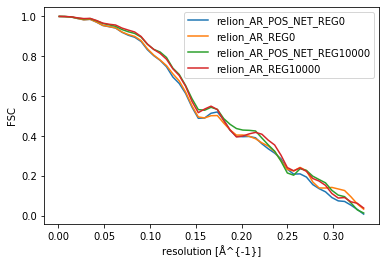

In [17]:
TAUS = [4, 8, 12, 16]
#for k, tau in enumerate(TAUS):
#    plt.plot(Classical_fsc[k][0], Classical_fsc[k][1], label='relion_tau{}'.format(tau))

AR_REG_PARS = [0, 10000]#, 12500, 15000, 17500, 20000, 25000, 30000, 50000, 100000]
for k, ar in enumerate(AR_REG_PARS):
    plt.plot(AR_POS_NET_fsc[k][0], AR_POS_NET_fsc[k][1], label='relion_AR_POS_NET_REG{}'.format(ar))   
    plt.plot(AR_fsc[k][0], AR_fsc[k][1], label='relion_AR_REG{}'.format(ar))   
    
plt.xlabel('resolution [Å^{-1}]')
plt.ylabel('FSC')



plt.legend()